In [1]:
# Loading the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Loading the dataset

data = pd.read_excel(r"C:\Users\Shashi\Model Building\Ensemble Models\Coca_Rating_Ensemble.xlsx")

In [4]:
# Checking the Head of data

data.head()

,Company,Name,REF,Review,Cocoa_Percent,Company_Location,Rating,Bean_Type,Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [7]:
# Importing the Libraries

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Checking the Value Count

data['Company'].value_counts()

Soma                 47
Bonnat               27
Fresco               26
Pralus               25
A. Morin             23
                     ..
Chocablog             1
Marigold's Finest     1
Chloe Chocolat        1
Chequessett           1
Ki' Xocolatl          1
Name: Company, Length: 416, dtype: int64

In [9]:
data['Name'].value_counts()

Madagascar                        57
Peru                              45
Ecuador                           42
Dominican Republic                37
Venezuela                         21
                                  ..
Conacado, #213, DR, -C             1
Sambirano Valley, #215, MR, MC     1
Chuao, #218, MR, MC                1
Chuao, #217, DR, MC                1
Brazil, Mitzi Blue                 1
Name: Name, Length: 1039, dtype: int64

In [11]:
# Checking the duplicates

data.duplicated().sum()

0

In [10]:
# Checking the Missing Values

data.isna().sum()

Company             0
Name                0
REF                 0
Review              0
Cocoa_Percent       0
Company_Location    0
Rating              0
Bean_Type           1
Origin              1
dtype: int64

In [13]:
# filling the missing values with mean

data['Bean_Type'] = data['Bean_Type'].fillna(data['Bean_Type'].mean)
data['Origin'] = data['Origin'].fillna(data['Origin'].mean)

In [14]:
data.isna().sum()

Company             0
Name                0
REF                 0
Review              0
Cocoa_Percent       0
Company_Location    0
Rating              0
Bean_Type           0
Origin              0
dtype: int64

In [21]:
data

,Company,Name,REF,Review,Cocoa_Percent,Company_Location,Rating,Bean_Type,Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,0.70,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,0.65,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,0.65,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,0.62,Austria,3.25,,India


In [36]:
#data['Bean_Type'] = data['Bean_Type'].astype('str')
#data['Bean_Type'] = data['Bean_Type'].replace({"^\s*|\s*$":" "}, regex=True)

In [39]:
data['Bean_Type'] = data['Bean_Type'].replace({"":np.nan}) 
data

,Company,Name,REF,Review,Cocoa_Percent,Company_Location,Rating,Bean_Type,Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,0.70,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,0.65,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,0.65,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,0.62,Austria,3.25,,India


In [40]:
# Checking the data types

data.dtypes

Company              object
Name                 object
REF                   int64
Review                int64
Cocoa_Percent       float64
Company_Location     object
Rating              float64
Bean_Type            object
Origin               object
dtype: object

In [43]:
data = data.astype('string')

In [41]:
# Encoder - LabelEncoder

from sklearn.preprocessing import LabelEncoder

In [44]:
enc = LabelEncoder()

data['Company'] = enc.fit_transform(data['Company'])
data['Name'] = enc.fit_transform(data['Name'])
data['Company_Location'] = enc.fit_transform(data['Company_Location'])
data['Bean_Type'] = enc.fit_transform(data['Bean_Type'])
data['Origin'] = enc.fit_transform(data['Origin'])

In [45]:
data

,Company,Name,REF,Review,Cocoa_Percent,Company_Location,Rating,Bean_Type,Origin
0,0,85,1876,2016,0.63,10,3.75,0,68
1,0,476,1676,2015,0.7,10,2.75,0,78
2,0,673,1676,2015,0.7,10,3.0,0,78
3,0,96,1680,2015,0.7,10,3.5,0,78
4,0,828,1704,2015,0.7,10,3.5,0,56
...,...,...,...,...,...,...,...,...,...
1790,347,767,647,2011,0.7,23,3.75,0,56
1791,347,216,749,2011,0.65,23,3.0,14,13
1792,347,466,749,2011,0.65,23,3.5,14,39
1793,347,466,781,2011,0.62,23,3.25,0,39


In [50]:
data = data.astype('float')

In [51]:
# Standardization - Scaling Min = 0, Max = 1

def norm_fun(i):
    x = (i - i.min())/(i.max() - i.min())
    
    return x

In [52]:
data_norm = norm_fun(data)
data = pd.DataFrame(data_norm)
data.describe()

,Company,Name,REF,Review,Cocoa_Percent,Company_Location,Rating,Bean_Type,Origin
count,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000
mean,0.483708,0.492252,0.529484,0.575032,0.512040,0.670289,0.546483,0.332482,0.465460
std,0.289912,0.286904,0.283968,0.266110,0.109019,0.308230,0.119516,0.366932,0.300249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222892,0.261561,0.293272,0.363636,0.482759,0.372881,0.468750,0.000000,0.210000
50%,0.506024,0.498073,0.546482,0.636364,0.482759,0.881356,0.562500,0.170732,0.460000
75%,0.720482,0.738921,0.768875,0.818182,0.568966,0.881356,0.625000,0.682927,0.705000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# Checking the data Correlation

data.corr()

,Company,Name,REF,Review,Cocoa_Percent,Company_Location,Rating,Bean_Type,Origin
Company,1.000000,0.008484,0.059325,0.062321,0.038177,0.012042,-0.052805,0.026419,-0.064124
Name,0.008484,1.000000,-0.020980,-0.027896,-0.069730,-0.074041,0.027227,0.074260,0.152479
REF,0.059325,-0.020980,1.000000,0.985076,0.037791,0.201752,0.101030,-0.160464,-0.103876
Review,0.062321,-0.027896,0.985076,1.000000,0.038177,0.222634,0.099846,-0.169270,-0.113772
Cocoa_Percent,0.038177,-0.069730,0.037791,0.038177,1.000000,-0.001133,-0.164820,0.013862,-0.011986
Company_Location,0.012042,-0.074041,0.201752,0.222634,-0.001133,1.000000,-0.023472,-0.048891,-0.060108
Rating,-0.052805,0.027227,0.101030,0.099846,-0.164820,-0.023472,1.000000,0.107761,-0.019396
Bean_Type,0.026419,0.074260,-0.160464,-0.169270,0.013862,-0.048891,0.107761,1.000000,0.203825
Origin,-0.064124,0.152479,-0.103876,-0.113772,-0.011986,-0.060108,-0.019396,0.203825,1.000000


<AxesSubplot:>

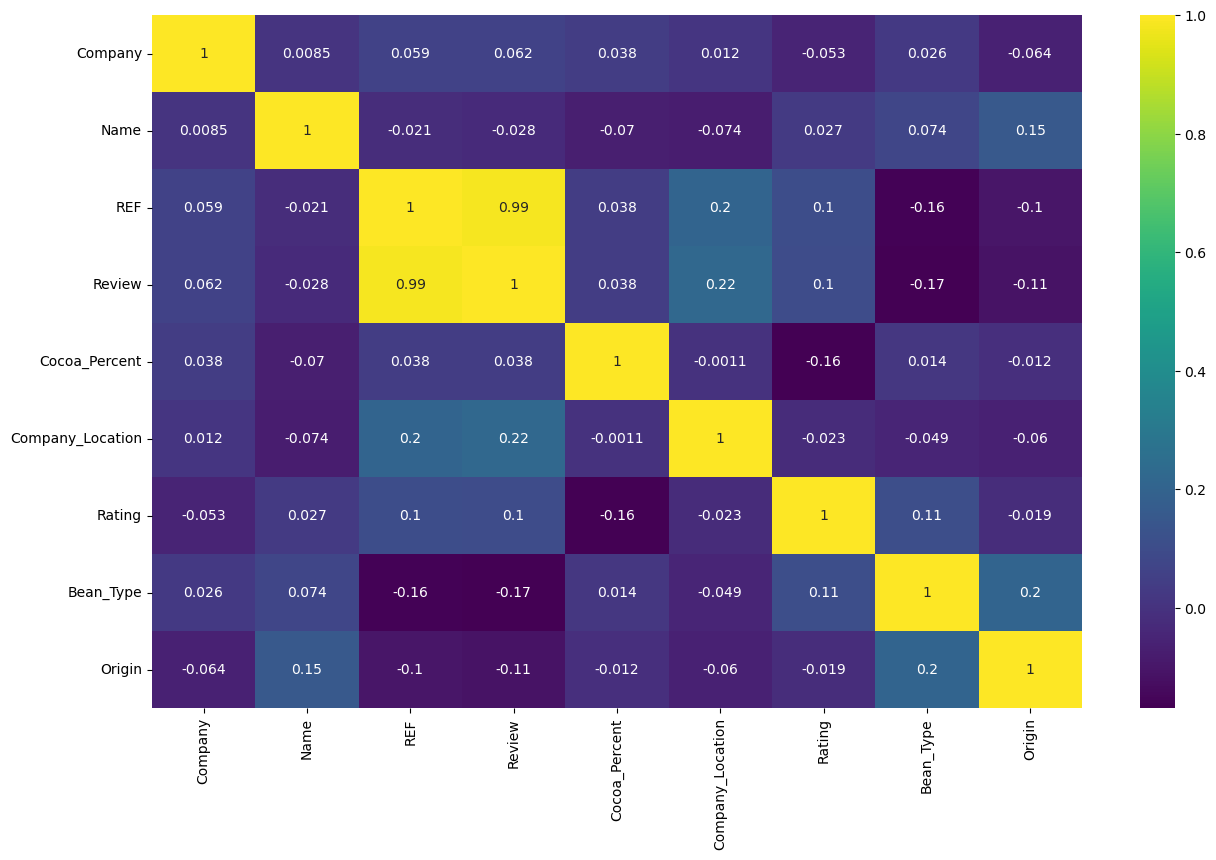

In [55]:
# Heat map

fig = plt.figure(figsize = (15,9))
sns.heatmap(data.corr(), cmap='viridis', annot = True) 

In [56]:
# Spliting the data

X = data.drop('Rating', axis = 1)
Y = data.Rating

In [57]:
# Importing the Train Test Split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [59]:
# Binarization - Discritization 

x_train = (x_train > 0).astype(int)
y_train = (y_train > 0).astype(int)

x_test = (x_test > 0).astype(int)
y_test = (y_test > 0).astype(int)

X = (X > 0).astype(int)
Y = (Y > 0).astype(int)

In [60]:
# Creating the Model

from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

# Checking the score of
model.score(X, Y)

0.9977715877437325

In [61]:
# Prediction on Test Data
y_pred = model.predict(x_test)
pd.crosstab(y_pred, y_test)

np.mean(y_pred == y_test) # Test Data Accuracy 

0.9972144846796658

In [62]:
# Bagging

from sklearn import tree
clftree = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier


bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators = 1000,
                            bootstrap = True, n_jobs = 1, random_state = 42)

bag_clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluation on Testing Data
confusion_matrix(y_test, bag_clf.predict(x_test))
accuracy_score(y_test, bag_clf.predict(x_test))

# Evaluation on Training Data
confusion_matrix(y_train, bag_clf.predict(x_train))
accuracy_score(y_train, bag_clf.predict(x_train))

0.9979108635097493

In [63]:
# Ada Boosting

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)

ada_clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluation on Testing Data
confusion_matrix(y_test, ada_clf.predict(x_test))
accuracy_score(y_test, ada_clf.predict(x_test))

# Evaluation on Training Data
accuracy_score(y_train, ada_clf.predict(x_train))


0.9979108635097493

In [64]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

boost_clf = GradientBoostingClassifier()

boost_clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix(y_test, boost_clf.predict(x_test))
accuracy_score(y_test, boost_clf.predict(x_test))

0.9972144846796658

In [65]:
# Hyper Tuning - GradientBoosting

boost_clf3 = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 5000, max_depth = 1)
boost_clf3.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluation on Testing Data
confusion_matrix(y_test, boost_clf3.predict(x_test))
accuracy_score(y_test, boost_clf3.predict(x_test))

# Evaluation on Training Data
accuracy_score(y_train, boost_clf3.predict(x_train))

0.9979108635097493

In [66]:
# xgboost - want output to be numeric

import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depths = 5, n_estimators = 10000, learning_rate = 0.3, n_jobs = -1)

# n_jobs – Number of parallel threads used to run xgboost.
# learning_rate (float) – Boosting learning rate (xgb’s “eta”)


xgb_clf.fit(x_train, y_train)

[09:38:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depths" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_depths=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', ...)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluation on Testing Data
confusion_matrix(y_test, xgb_clf.predict(x_test))
accuracy_score(y_test, xgb_clf.predict(x_test))


0.9972144846796658

In [69]:
# GridsearchCV
xgb_clf = xgb.XGBClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 42)

param_test1 = {'max_depth': range(3,10,2), 'gamma': [0.1, 0.2, 0.3],
               'subsample': [0.8, 0.9], 'colsample_bytree': [0.8, 0,9],
               'reg_alpha': [1e-2, 0.1, 1]}

# Grid Search
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs = -1, cv = 5, scoring = 'accuracy')

grid_search.fit(x_train, y_train)

grid_search.best_params_
cv_xg_clf = grid_search.best_estimator_

# Evaluation on Testing Data with model with hyperparameter
accuracy_score(y_test, cv_xg_clf.predict(x_test))



0.9972144846796658

In [70]:
### k-Nearest Neighbors (k-NN) with GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

params_knn = {'n_neighbors': np.arange(1, 25)}

knn_gs = GridSearchCV(knn, params_knn, cv = 5)

knn_gs.fit(x_train, y_train)
knn_best = knn_gs.best_estimator_
knn_best

KNeighborsClassifier(n_neighbors=1)

In [71]:
### Random Forest Classifier with GridSearchCV

from sklearn import datasets, linear_model, svm, neighbors, naive_bayes, ensemble

rf = ensemble.RandomForestClassifier(random_state = 0)

params_rf = {'n_estimators': [50, 100, 200]}

rf_gs = GridSearchCV(rf, params_rf, cv = 5)

rf_gs.fit(x_train, y_train)
rf_best = rf_gs.best_estimator_

In [72]:
### Logistic Regression with GridSearchCV
log_reg = linear_model.LogisticRegression(random_state = 123, solver = "liblinear", 
                                          penalty = "l2", max_iter = 5000)
C = np.logspace(1, 4, 10)
params_lr = dict(C = C)

lr_gs = GridSearchCV(log_reg, params_lr, cv = 5, verbose = 0)

lr_gs.fit(x_train, y_train)
lr_best = lr_gs.best_estimator_

In [73]:
# Combine all three Voting Ensembles

from sklearn.ensemble import VotingClassifier

estimators = [('knn', knn_best), ('rf', rf_best), ('log_reg', lr_best)]

# Instantiate the voting classifier
ensemble_H = VotingClassifier(estimators, voting = "hard")

# Fit classifier with the training data
hard_voting = ensemble_H.fit(x_train, y_train)

In [74]:
# Save the voting classifier

import pickle

pickle.dump(hard_voting, open('hard_voting.pkl', 'wb'))

# Loading a saved model
model = pickle.load(open('hard_voting.pkl', 'rb'))
model

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=1)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=0)),
                             ('log_reg',
                              LogisticRegression(C=10.0, max_iter=5000,
                                                 random_state=123,
                                                 solver='liblinear'))])

In [75]:
print("knn_gs.score: ", knn_best.score(x_test, y_test))
# Output: knn_gs.score:

print("rf_gs.score: ", rf_best.score(x_test, y_test))
# Output: rf_gs.score:

print("log_reg.score: ", lr_best.score(x_test, y_test))
# Output: log_reg.score:

knn_gs.score:  0.9972144846796658
rf_gs.score:  0.9972144846796658
log_reg.score:  0.9972144846796658


In [76]:
print("ensemble.score: ", ensemble_H.score(x_test, y_test))
# Output: ensemble.score:

ensemble.score:  0.9972144846796658


In [77]:
# Soft Voting

# Combine all 3 models using VotingClassifier with voting = "soft" parameter
estimators = [('knn', knn_best), ('rf', rf_best), ('log_reg', lr_best)]

ensemble_S = VotingClassifier(estimators, voting = "soft")

soft_voting = ensemble_S.fit(x_train, y_train)

In [78]:
# Soft Voting

# Save model
pickle.dump(soft_voting, open('soft_voting.pkl', 'wb'))


# Load the saved model
model = pickle.load(open('soft_voting.pkl', 'rb'))
model

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=1)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=0)),
                             ('log_reg',
                              LogisticRegression(C=10.0, max_iter=5000,
                                                 random_state=123,
                                                 solver='liblinear'))],
                 voting='soft')

In [79]:
print("knn_gs.score: ", knn_gs.score(x_test, y_test))
# Output: knn_gs.score:

print("rf_gs.score: ", rf_gs.score(x_test, y_test))
# Output: rf_gs.score:

print("log_reg.score: ", lr_gs.score(x_test, y_test))
# Output: log_reg.score:

knn_gs.score:  0.9972144846796658
rf_gs.score:  0.9972144846796658
log_reg.score:  0.9972144846796658


In [80]:
print("ensemble.score: ", ensemble_S.score(x_test, y_test))
# Output: ensemble.score: AVG or WT.AVG

ensemble.score:  0.9972144846796658


In [81]:
# Import Libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [82]:
# Stacking

# Base estimators

estimators = [('rf', RandomForestClassifier(n_estimators = 10, random_state = 42)),
              ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state = 42)))]

In [83]:
# Meta Model stacked on top of base estimators

clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())

In [84]:
# Fit the model on traing data

stacking = clf.fit(x_train, y_train)

In [85]:
# Accuracy

stacking.score(x_test, y_test)

0.9972144846796658

In [86]:
# Save the Stacking model 
pickle.dump(stacking, open('stacking_Cocoa.pkl', 'wb'))

In [87]:
# Load the saved model

model = pickle.load(open('stacking_Cocoa.pkl', 'rb'))
model

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

In [88]:
pred = model.predict(x_test)

In [89]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [90]:
y_test

1368    1
1705    1
927     1
713     1
262     1
       ..
1296    1
506     1
557     1
1728    1
638     1
Name: Rating, Length: 359, dtype: int32

## Result : This model score is more than 99%, By Performing Boosting, Bagging, Voting, Staking with Grid Search Cv, identifying the best score and best parameter, concluding by saying this model is right fit